# Init

In [ ]:
import cv2 as cv
import ipywidgets
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns
import skimage
import sklearn.cluster

In [ ]:
sns.set(style='dark')
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['image.cmap'] = 'viridis'
np.set_printoptions(threshold=20, edgeitems=10, linewidth=140, precision=3, suppress=True)

# Task 0: Load `sudoku-alt3.jpg` and detect edges using the Canny method

In [ ]:
# ...

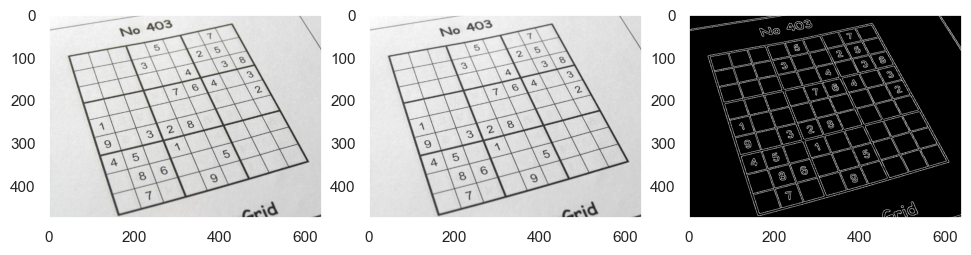

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=plt.figaspect(0.5))
axes[0].imshow(rgb)
axes[1].imshow(gray, cmap='gray', vmin=0., vmax=1.);
axes[2].imshow(edges, cmap='gray', vmin=0., vmax=1.);

# Task 1: find the 4 border lines of the sudoku grid

Use the Hough transform to detect grid lines of the sudoku. We only are interested in the border lines that outline the grid - the other ones inside the grid do not matter.
- The Hough transform will probably return the lines inside the grid as well.
- Separate horizontal and vertical lines. Horizontal lines will have angles close to $\pm\pi/2$, vertical ones close to $0$ (details depend on whether you use scikit-image or OpenCV).
- The top most line will be the horizontal line with the smallest distance from the origin. The bottom-most line will be the horizontal line with the largest distance from the origin.
- In a similar manner, you can identify the left-most and right-most vertical lines as well.

In [ ]:
# ...

In [ ]:
def draw_hough_lines(ax, rgb, hough_lines, color='r'):
    ax.imshow(rgb);
    ax.set_xlim(0, rgb.shape[1])
    ax.set_ylim(rgb.shape[0], 0)
    for dist, angle in hough_lines:
        y1 = dist / np.sin(angle) if angle not in (-np.pi, 0., np.pi) else 1e9
        x2 = dist / np.cos(angle) if angle not in (-np.pi / 2., np.pi / 2.) else 1e9
        ax.axline((0, y1 if not np.isinf(y1) else 1e9), (x2 if not np.isinf(x2) else 1e9, 0), color=color)

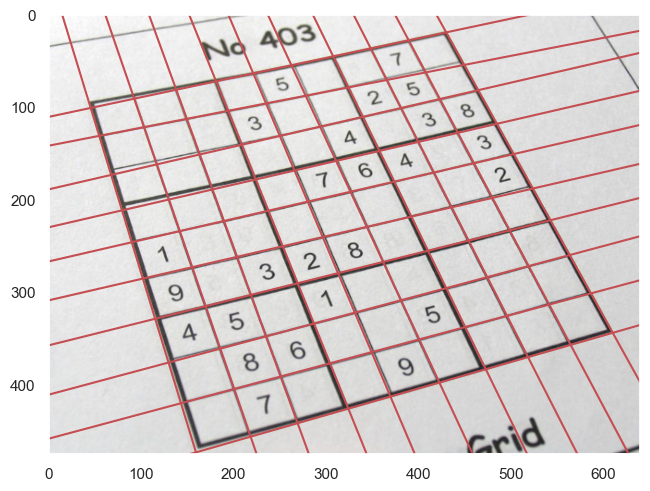

In [ ]:
plt.imshow(rgb);
draw_hough_lines(plt.gca(), rgb, lines)

In [ ]:
# ...

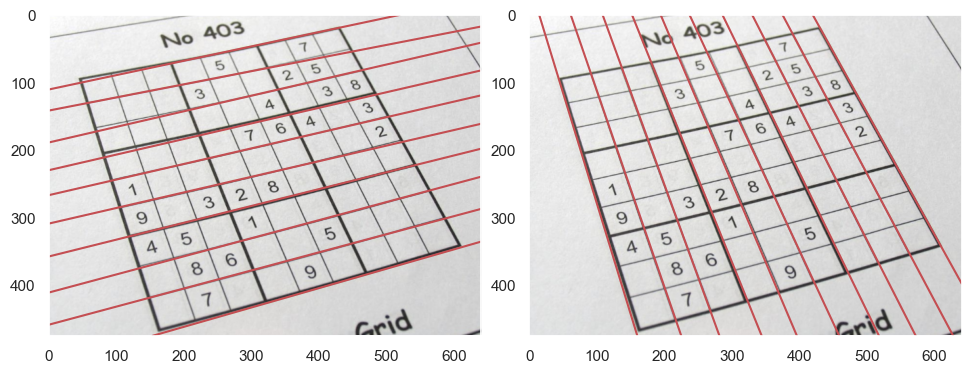

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=plt.figaspect(0.5))
draw_hough_lines(axes[0], rgb, lines[hor_mask])
draw_hough_lines(axes[1], rgb, lines[ver_mask])

In [ ]:
# idx_left = ...
# idx_right = ...
# idx_top = ...
# idx_bottom = ...

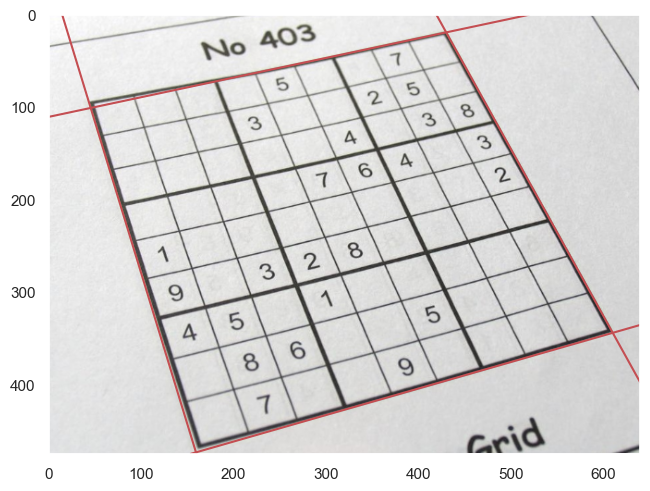

In [ ]:
draw_hough_lines(
    plt.subplots()[1],
    rgb,
    lines[[idx_left, idx_right, idx_top, idx_bottom]]
)

# Task 2: implement the `line_intersect` function

Define a function for line-line intersection. You can calculate an intersection of two lines $(a_1, b_1, c_1)$ and $(a_2, b_2, c_2)$ in standard form as
$$
\begin{split}
(x, y, z) & = (a_1, b_1, c_1) \times (a_2, b_2, c_2) \\
          & = (b_1c_2 - b_2c_1, a_2c_1 - a_1c_2, a_1b_2 - a_2b_1)
\end{split}
$$
where
- $\times$ denotes the [cross product](https://en.wikipedia.org/wiki/Cross_product) of the two vectors,
- $(x, y, z)$ are the unnormalized homogennous corrdinates of the intersection point. To get the final cartesian 2D corrdinates $(x', y')$, divide by $z$:
$$
(x', y') = \left(\frac{x}{z}, \frac{y}{z}\right)
$$
You can use the function [`numpy.cross`](https://numpy.org/doc/stable/reference/generated/numpy.cross.html) from the numpy library for computing the cross product.

Remember that from the Hough transform and the subsequent clustering we got the lines in polar coordinates, i.e. in the form
$$
x \cdot \cos \theta + y \cdot \sin \theta - r = 0
$$
so you first need to convert into the standard $(a,b,c)$ form
$$
a \cdot x + b \cdot y + c = 0
$$

In [ ]:
# `tuple[float, float]` type hinting throws exception for python < 3.9
# https://stackoverflow.com/a/39458225/9418551

def line_intersect(
    dist1: float,
    angle1: float,
    dist2: float,
    angle2: float
) -> tuple[float, float]:
    """
    Args:
        dist1: offset of 1st line from the origin,
        angle1: angle of the 1st line,
        dist2: offset of 2nd line from the origin,
        angle2: angle of the 2nd line,
    Returns:
        (x, y) cartesian coordinates of the intersection point between line1 and line2
    """
    ########################################
    # TODO: implement
    
    

    # ENDTODO
    
    return x, y

# Task 3: use the `line_intersect` function to detect the 4 corners of the sudoku table

Create a $4 \times 2$ matrix `corners`, which will be
$$
\bold{C} = \begin{bmatrix}
x_\textrm{tl} & y_\textrm{tl} \\
x_\textrm{tr} & y_\textrm{tr} \\
x_\textrm{br} & y_\textrm{br} \\
x_\textrm{bl} & y_\textrm{bl}
\end{bmatrix}
$$

In [ ]:
# calculate the intersection of left most and top most
# xtl, ytl = ...
# xtr, ytr = ...
# xbr, ybr = ...
# xbl, ybl = ...

In [ ]:
# array of shape (4, 2) of four (x, y) pairs
# automatically calculated cornes from line intersections
# corners = ...
corners

array([[ 45.443, 100.754],
       [430.134,  18.985],
       [610.346, 344.095],
       [159.375, 473.409]])

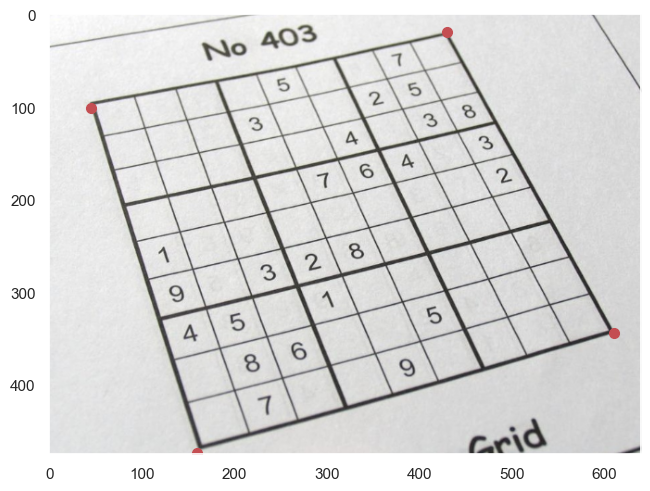

In [ ]:
plt.imshow(rgb)
plt.plot(corners[:, 0], corners[:, 1], 'or', markersize=7);

# Task 4: extract and align the sudoku grid to standard size and coordinates

Take the code from `geom-transform` notebook and use the computed corner positions instead of the manually specified ones.

In [ ]:
# extract region of interest from the RGB image as per geom-transform lecture
# ...
# roi = ...

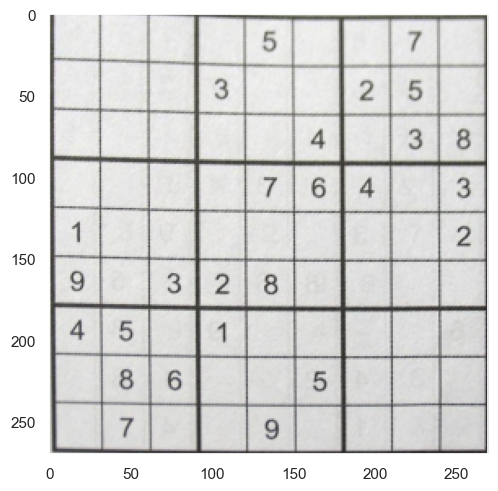

In [ ]:
plt.imshow(roi);